In [1]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## All the Lifecycle In A Data Science Projects
1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df=pd.read_csv("/content/drive/My Drive/DataSet/house-prices-advanced-regression-techniques/train.csv")
df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### In Data Analysis We will Analyze To Find out the below stuff
1. Missing Values
2. All The Numerical Variables
3. Distribution of the Numerical Variables
4. All Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between independent and dependent feature(SalePrice)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
##Missing Values 
miss_val=[feature for feature in df.columns if( df[feature].isna().sum() > 1 ) ]
for miss in miss_val:
  print("Feature : " + miss + " missing Percentage --> " , round(df[miss].isna().sum() / len( df[miss] ) ,5) )

##All Numerical Variables 
All_numeric=[feature for feature in df.columns if (df[feature].dtypes != 'O')  ]
print("\n\nUnique Numerical --> " , len(All_numeric))

for _feature in All_numeric:
  print("Feature " + _feature + " Total Uniques --> " , df[_feature].nunique())

##All Categorical Variables 
All_Categorical= [ feature for feature in df.columns if ( df[feature].dtypes == 'O' ) ] 
print("\n\nUnique Categorical --> ",len(All_Categorical))
for _feature in All_Categorical:
  print("Feature " + _feature + " Total Unqiues " , df[_feature].nunique() )   

Feature : LotFrontage missing Percentage -->  0.1774
Feature : Alley missing Percentage -->  0.93767
Feature : MasVnrType missing Percentage -->  0.00548
Feature : MasVnrArea missing Percentage -->  0.00548
Feature : BsmtQual missing Percentage -->  0.02534
Feature : BsmtCond missing Percentage -->  0.02534
Feature : BsmtExposure missing Percentage -->  0.02603
Feature : BsmtFinType1 missing Percentage -->  0.02534
Feature : BsmtFinType2 missing Percentage -->  0.02603
Feature : FireplaceQu missing Percentage -->  0.4726
Feature : GarageType missing Percentage -->  0.05548
Feature : GarageYrBlt missing Percentage -->  0.05548
Feature : GarageFinish missing Percentage -->  0.05548
Feature : GarageQual missing Percentage -->  0.05548
Feature : GarageCond missing Percentage -->  0.05548
Feature : PoolQC missing Percentage -->  0.99521
Feature : Fence missing Percentage -->  0.80753
Feature : MiscFeature missing Percentage -->  0.96301


Unique Numerical -->  38
Feature Id Total Uniques --

In [5]:
## Analyze Variables Distribution 
## Take The Discrete Variables/features
Date_Var=[Feature for Feature in All_numeric if ("Yr" in Feature or "Year" in Feature) ] 
Discrete_var=[Feature for Feature in All_numeric if (   df[Feature].nunique() < 25  and Feature not in Date_Var + ["Id"] )  ]
Continues_var=[Feature for Feature in All_numeric if ( Feature not in Discrete_var + Date_Var + ["Id"] ) ]

for _f in Date_Var:
  print(_f,df[_f].nunique())
print("Len --> ",len(Date_Var))  
print("\n\n")  

for _f in Discrete_var:
  print(_f ,df[_f].nunique())

print("Len --> ",len(Discrete_var))
print("\n\n")  

for _f in Continues_var:
  print(_f,df[_f].nunique())                                                        
print("Len --> ",len(Continues_var))




YearBuilt 112
YearRemodAdd 61
GarageYrBlt 97
YrSold 5
Len -->  4



MSSubClass 15
OverallQual 10
OverallCond 9
LowQualFinSF 24
BsmtFullBath 4
BsmtHalfBath 3
FullBath 4
HalfBath 3
BedroomAbvGr 8
KitchenAbvGr 4
TotRmsAbvGrd 12
Fireplaces 4
GarageCars 5
3SsnPorch 20
PoolArea 8
MiscVal 21
MoSold 12
Len -->  17



LotFrontage 110
LotArea 1073
MasVnrArea 327
BsmtFinSF1 637
BsmtFinSF2 144
BsmtUnfSF 780
TotalBsmtSF 721
1stFlrSF 753
2ndFlrSF 417
GrLivArea 861
GarageArea 441
WoodDeckSF 274
OpenPorchSF 202
EnclosedPorch 120
ScreenPorch 76
SalePrice 663
Len -->  16


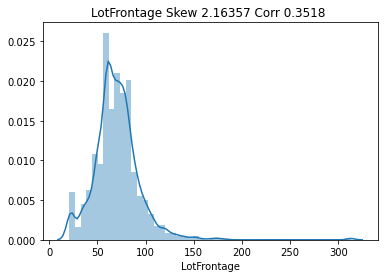

Alley is A categorical Var 
MasVnrType is A categorical Var 


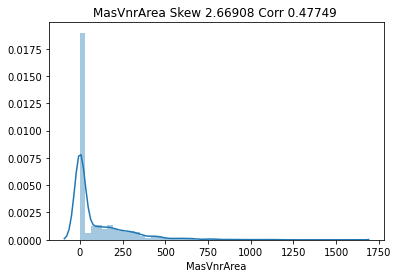

BsmtQual is A categorical Var 
BsmtCond is A categorical Var 
BsmtExposure is A categorical Var 
BsmtFinType1 is A categorical Var 
BsmtFinType2 is A categorical Var 
FireplaceQu is A categorical Var 
GarageType is A categorical Var 


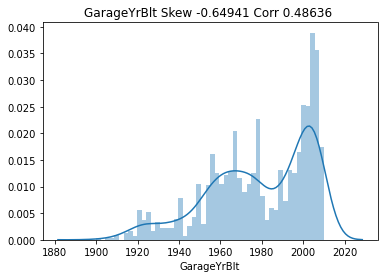

GarageFinish is A categorical Var 
GarageQual is A categorical Var 
GarageCond is A categorical Var 
PoolQC is A categorical Var 
Fence is A categorical Var 
MiscFeature is A categorical Var 


In [6]:
#Check The Skewness To Determine the Null Values Impact
from scipy.stats import skew,kurtosis
for _feature in miss_val:
  if(df[_feature].dtypes != "O"):
    sns.distplot( a = df[_feature],norm_hist=True,bins=50)
    plt.title(_feature + " Skew {} Corr {} ".format( round(df[_feature].skew() ,5 ) ,\
                                                                round( df[_feature].corr(df["SalePrice"] ) ,5 ) ) ) 
    plt.show()
  else:
    print(_feature + " is A categorical Var " )  


We will Using Median,since Our Numeric Data Skewed ,lol

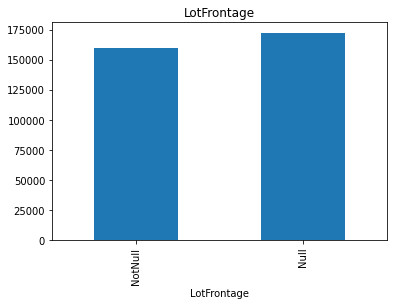

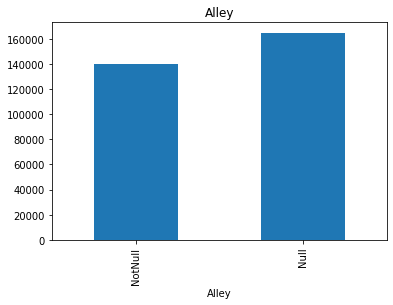

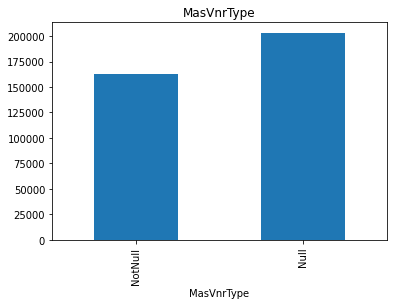

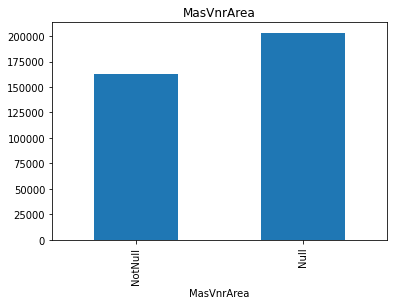

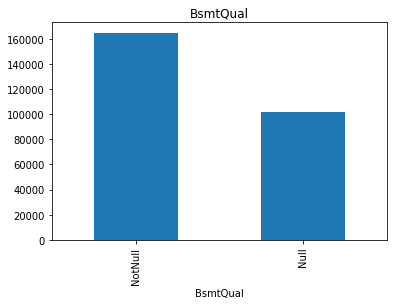

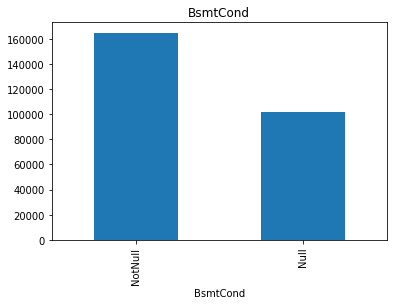

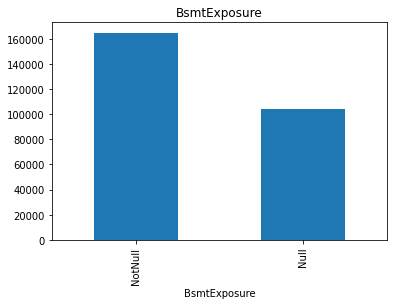

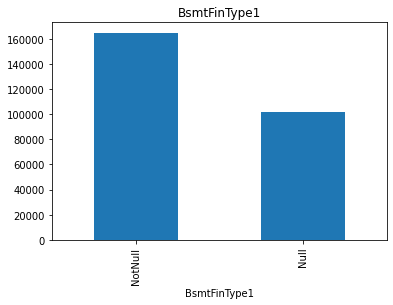

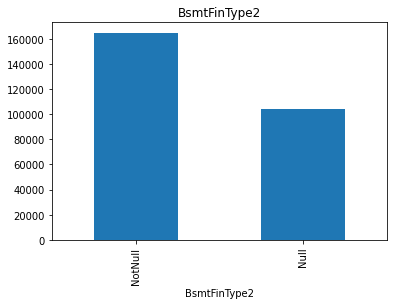

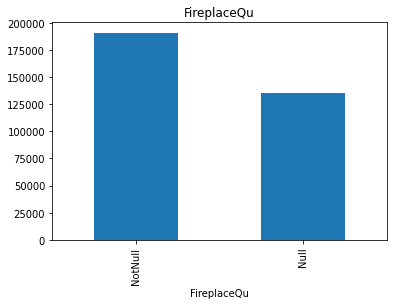

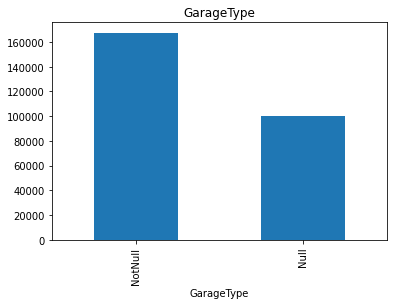

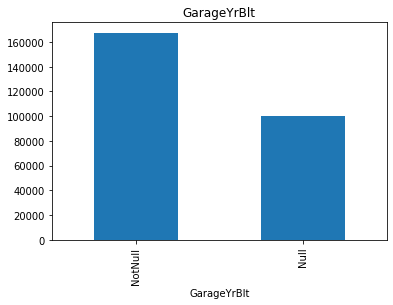

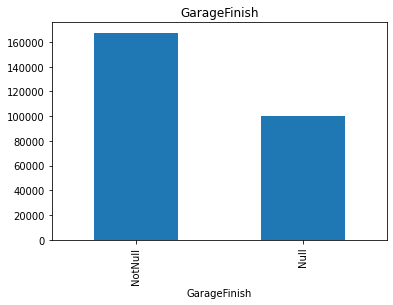

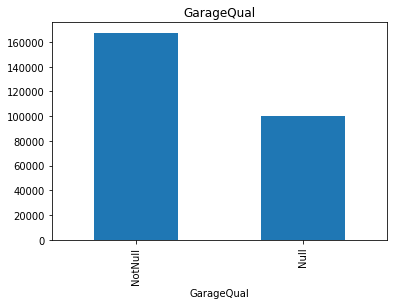

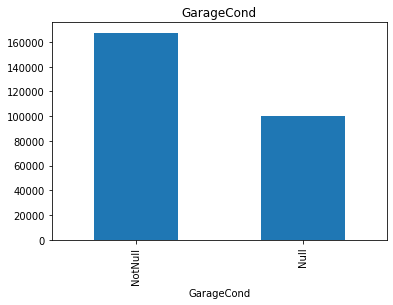

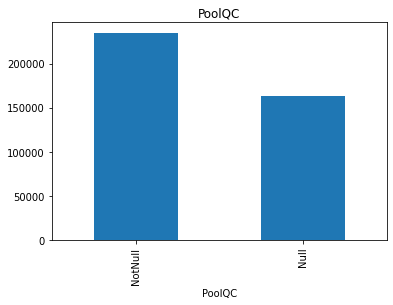

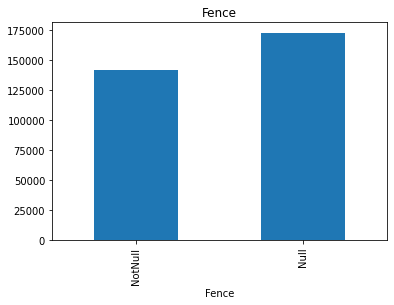

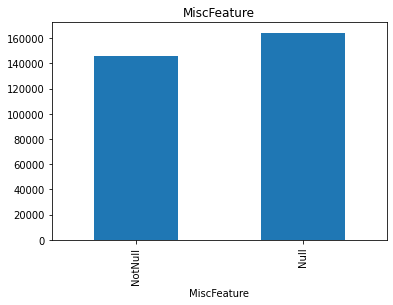

In [7]:
## Analyze Impact Of Null Values :

_test=df.copy()
for _feature in miss_val:
  
  _test[_feature] = np.where(_test[_feature].isna(),"Null","NotNull")
  _test.groupby(_feature)["SalePrice"].median().plot.bar()
  plt.title(_feature)
  plt.show()

##Categorical Variable will Not Affect The Mean and median ,they remain same ,go try yourself
##Median --> Represent the majority of dataset


Since the NullValues Have Huge Impact on sellPrice,thus we need to fix this out ,Later ok,we need to find Insight first.

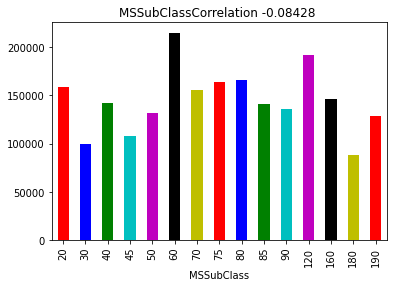

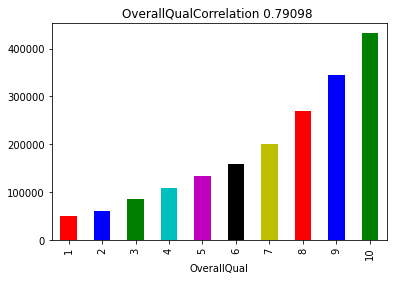

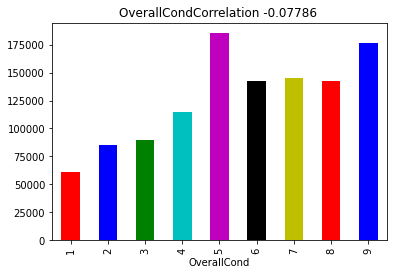

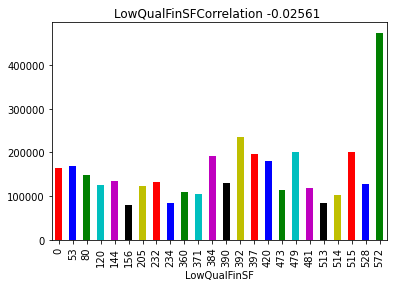

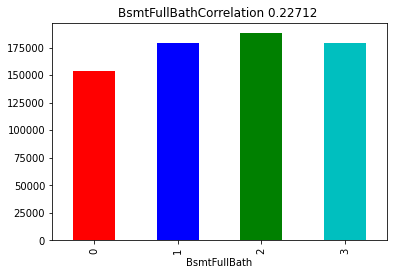

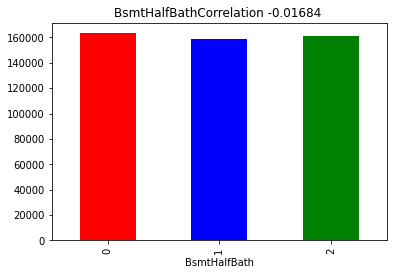

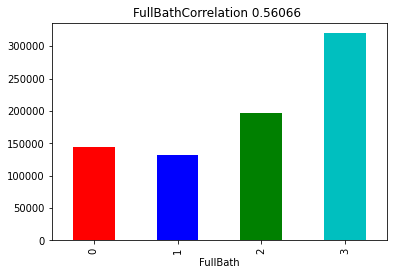

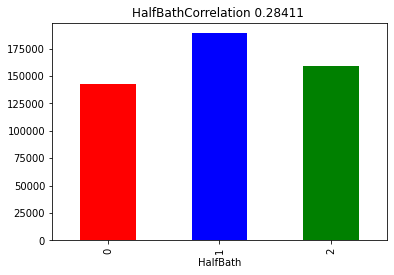

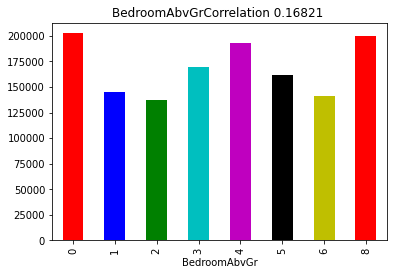

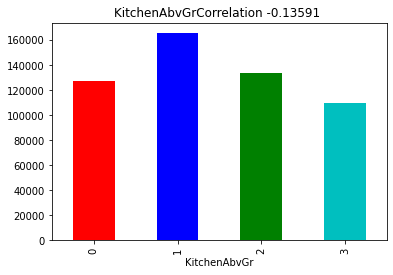

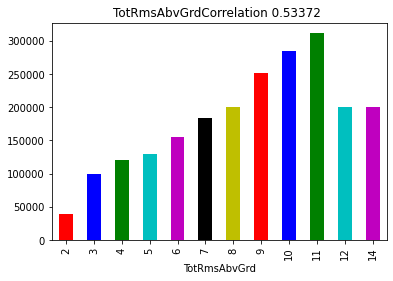

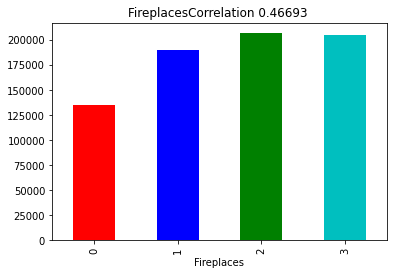

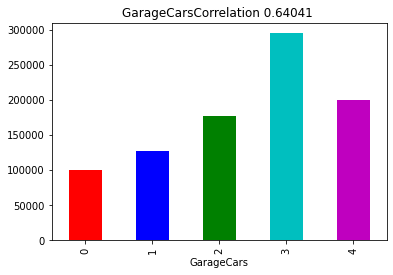

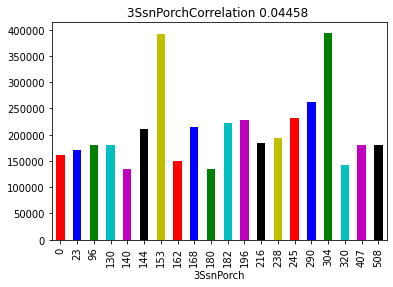

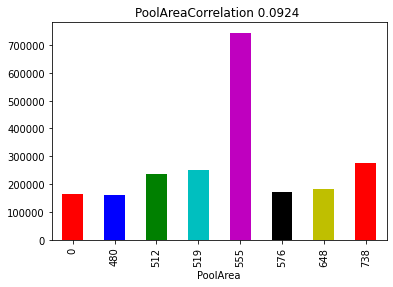

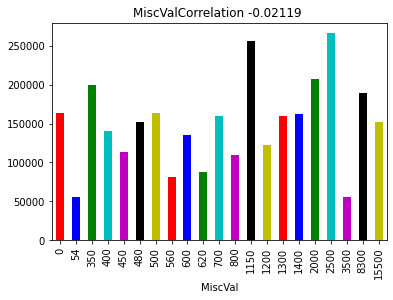

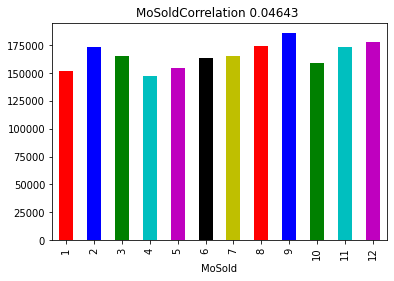

In [8]:
## Numerical Values Analysis Discrete
 
data=df.copy()
for _feature in Discrete_var:
  data.groupby(_feature)["SalePrice"].median().plot.bar(color=["r","b","g","c","m","k","y"])
  plt.title(_feature + "Correlation {} ".format( np.round( data[_feature].corr(data["SalePrice"] ) ,5 ) ) )
  plt.show()


Almost every Single Discrete Numeric Variables not have big impact to SalePrice ,Lol

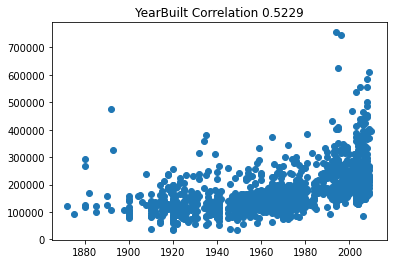

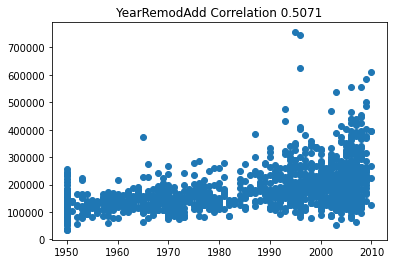

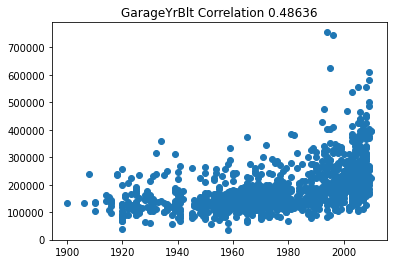

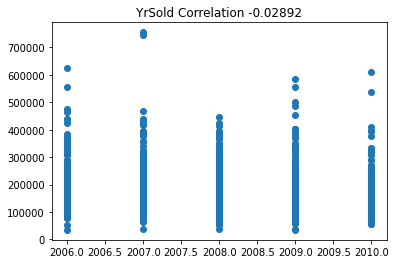

In [9]:
##Checking Date Numerical Var

data=df.copy()
for _feature in Date_Var:
  plt.scatter(x=data[_feature], y=data["SalePrice"])
  plt.title(_feature + " Correlation {}".format( np.round( data[_feature].corr(data["SalePrice"]) , 5)))
  plt.show()

Make Sense -- > SalePrice Raising based on yearbuilt  and Remod ofcourse raising the price 
#Let see with line plot and scatter plot based on YrSold


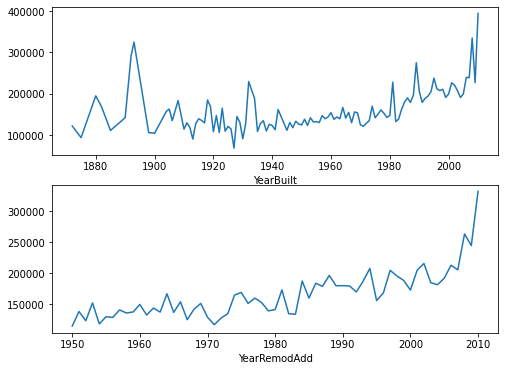

In [10]:
## Checking if year build Affecting YRSold
f,ax=plt.subplots(nrows=2,figsize=(8,6))

df.groupby("YearBuilt")["SalePrice"].median().plot(ax=ax[0])
df.groupby("YearRemodAdd")["SalePrice"].median().plot(ax=ax[1])

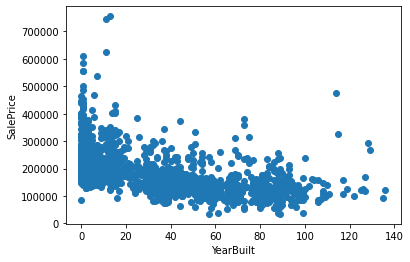

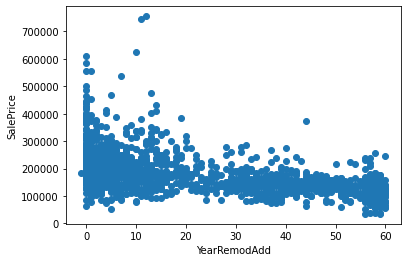

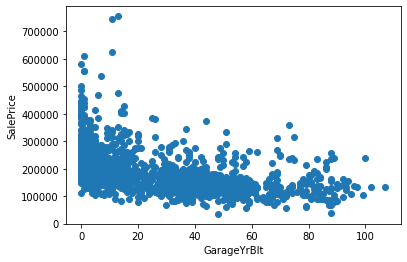

In [11]:
## Check if Year Sold And built affect Saleprice

for _feature in Date_Var:
  if(_feature != "YrSold"):
    data=df.copy()
    data[_feature] = data["YrSold"] - data[_feature]
    plt.scatter(data[_feature],data["SalePrice"])
    plt.xlabel(_feature)
    plt.ylabel("SalePrice")
    plt.show()
  


Yeah  seems the older of house affect the price dramatically

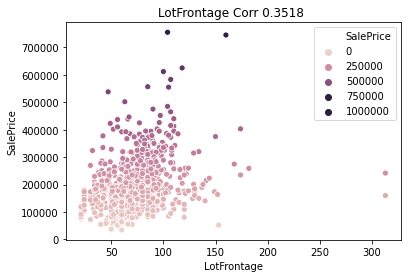

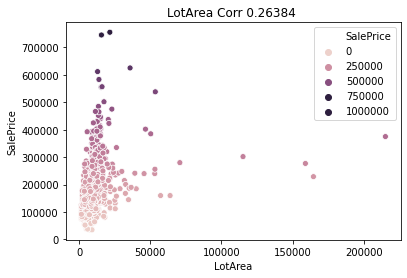

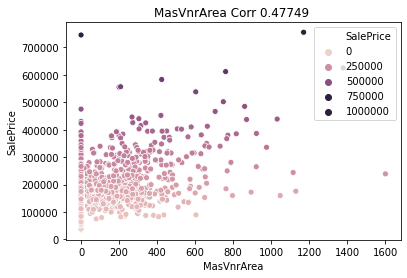

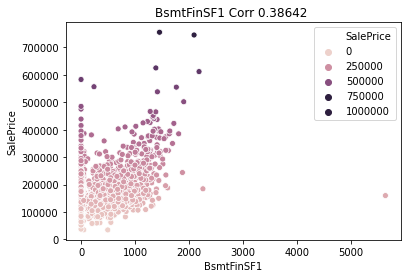

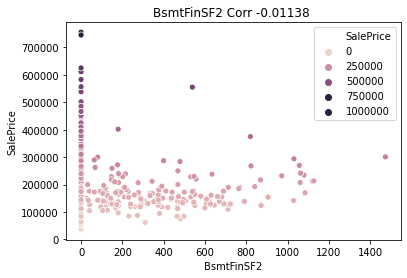

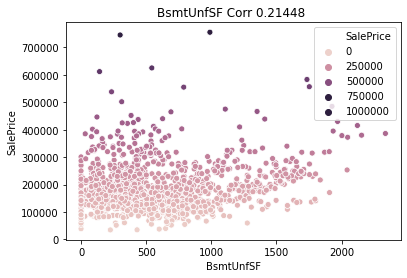

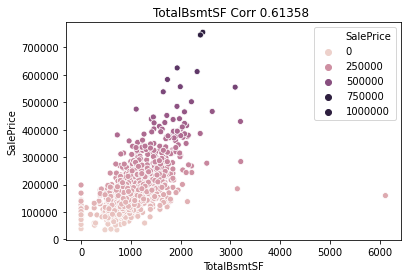

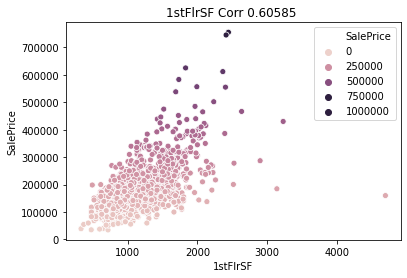

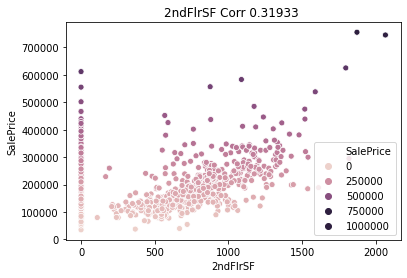

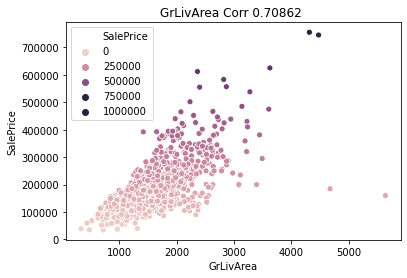

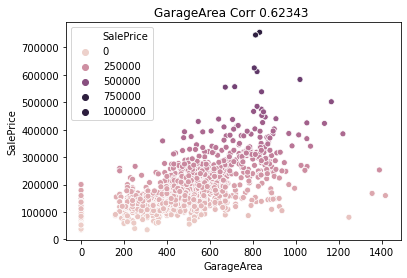

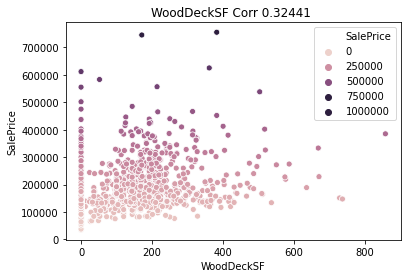

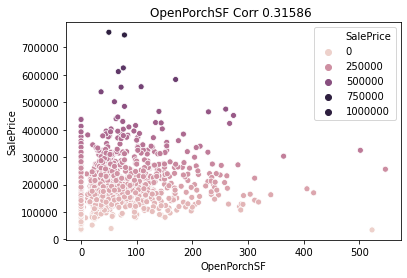

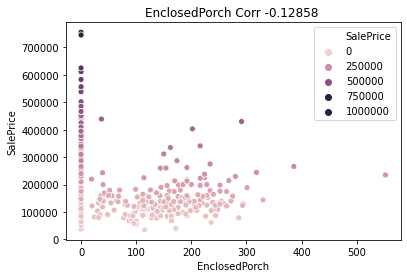

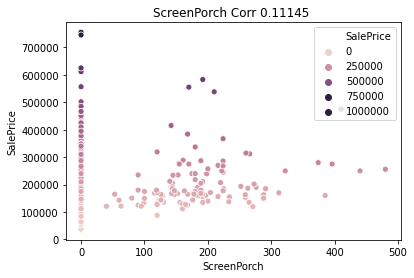

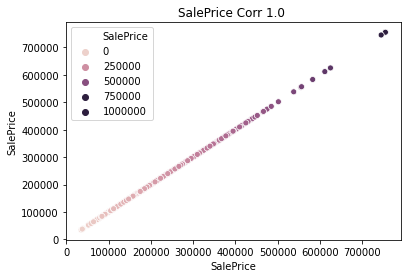

In [12]:
## Check The continous Variables 

for _feature in Continues_var:
  data=df.copy()
  sns.scatterplot(data[_feature],data["SalePrice"],hue=data["SalePrice"])
  plt.title(_feature + " Corr {} " .format( np.round(data[_feature].corr(data["SalePrice"]) ,5 )  ))
  plt.show()

  

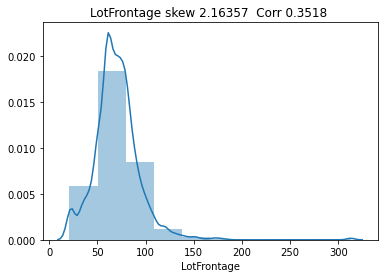

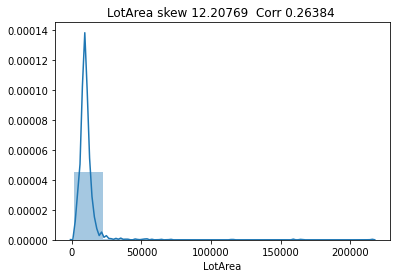

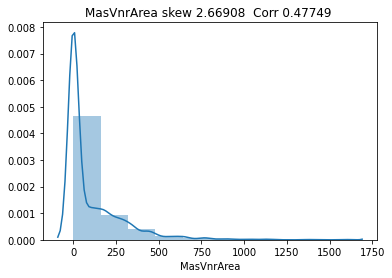

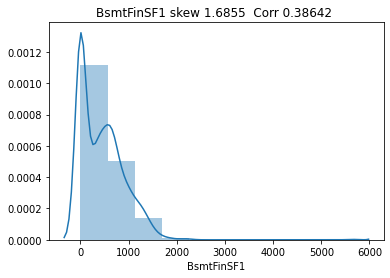

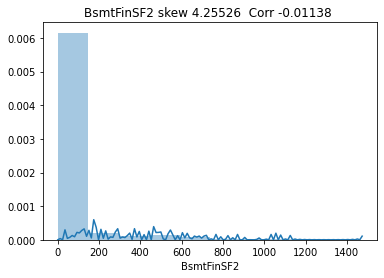

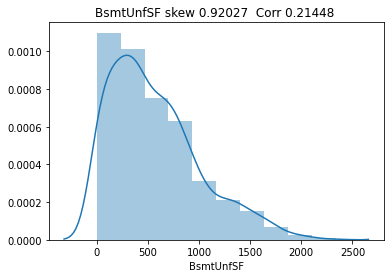

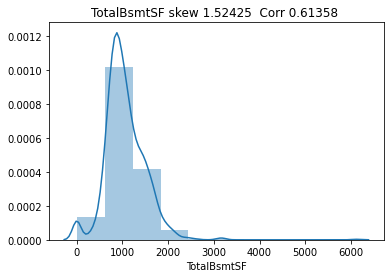

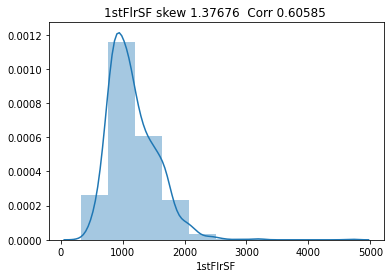

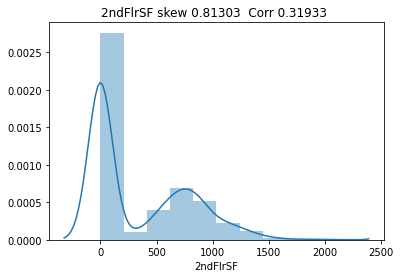

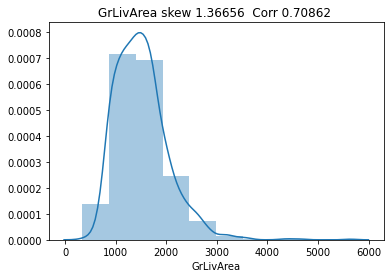

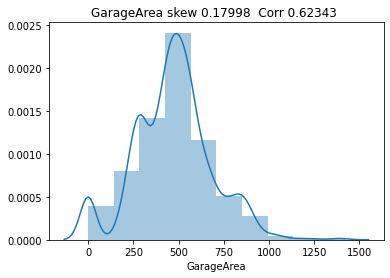

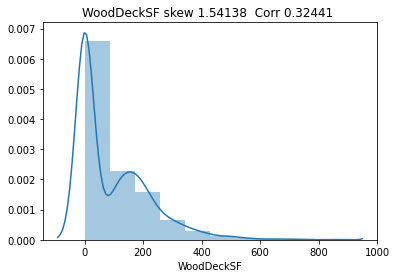

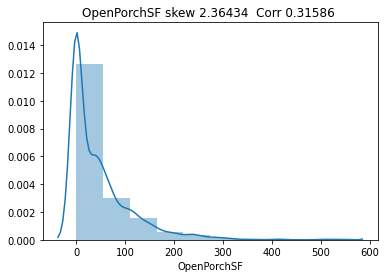

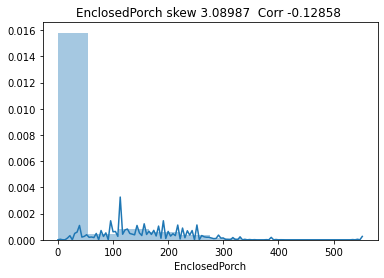

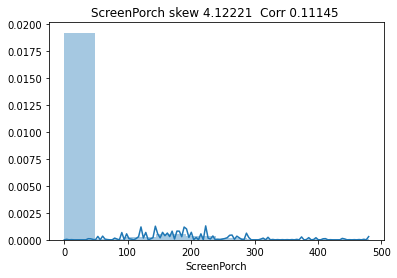

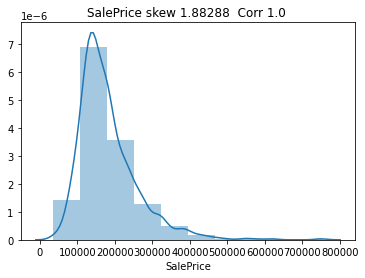

In [13]:
## Checking The Skewness Of ContinousData
for _feature in Continues_var:
  print()
  data=df.copy()
  sns.distplot( a=data[_feature],bins=10,norm_hist=True )
  plt.title( _feature + " skew {}  Corr {} ".format( round(data[_feature].skew() ,5)  , round(data[_feature].corr(data["SalePrice"] ) , 5 ) ) )
  plt.show()

Skewed ,lol i guess m going to transform it using Log,ONLY Var not contain 0(Continues only)

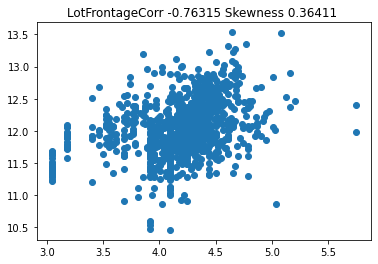

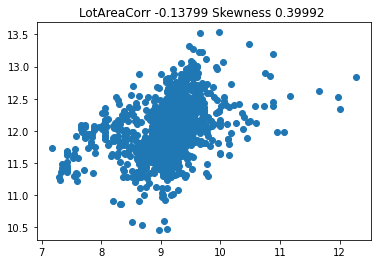

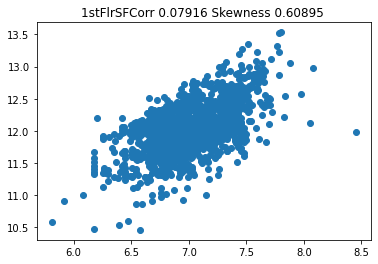

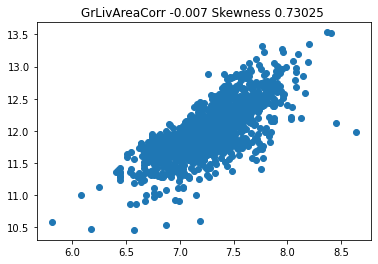

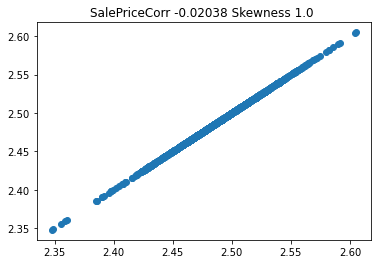

In [18]:
for _feature in Continues_var:
  data=df.copy()
  if 0 not in data[_feature].unique():
    data[_feature]=np.log(data[_feature])
    data["SalePrice"]=np.log(data["SalePrice"])
    plt.scatter(data[_feature],data["SalePrice"])
    plt.title(_feature + "Corr {} Skewness {} " .format( round(data[_feature].skew() ,5) , round( data[_feature].corr(data["SalePrice"]) ,5 )) )
    plt.show()

    

Well Still Skewed,but it's better than previous Skewed ,lol

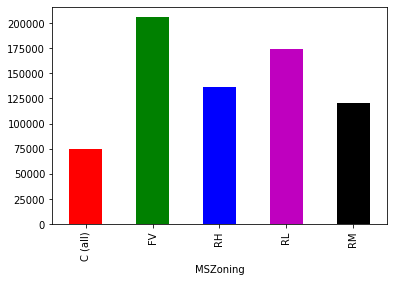

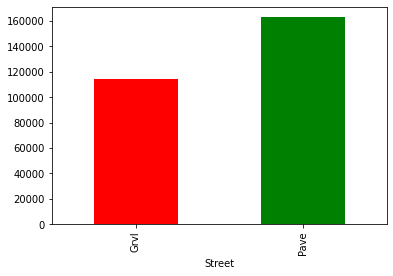

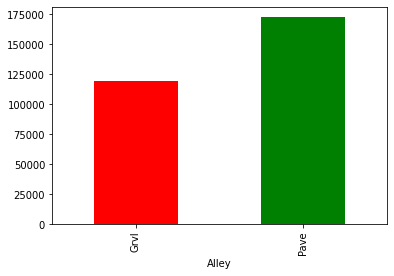

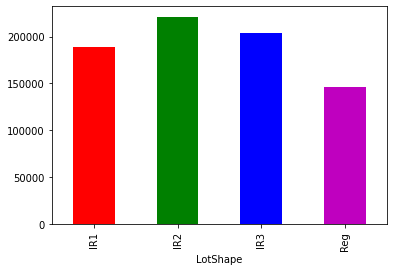

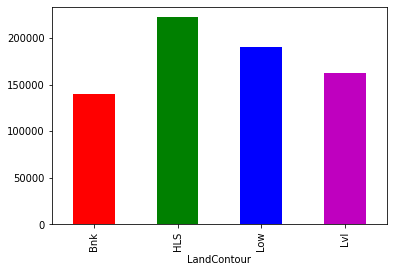

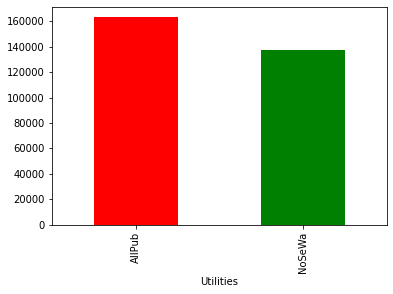

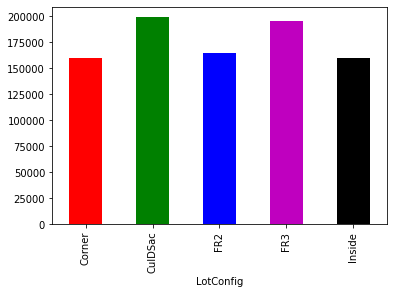

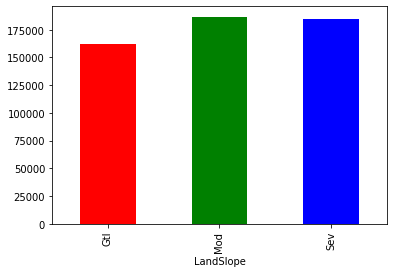

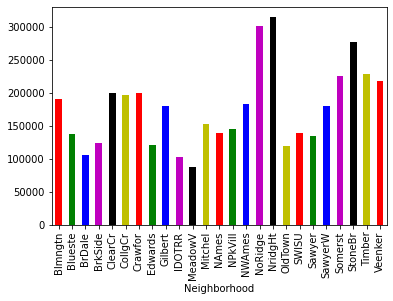

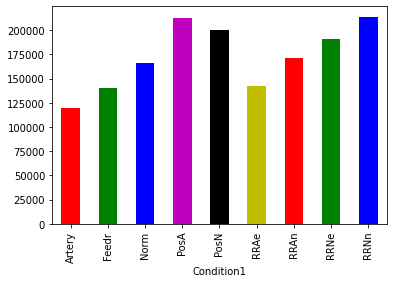

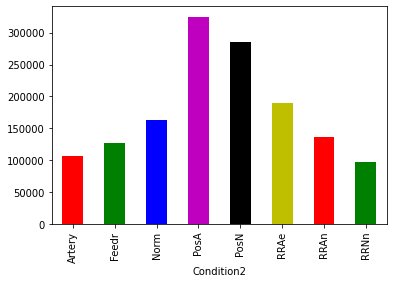

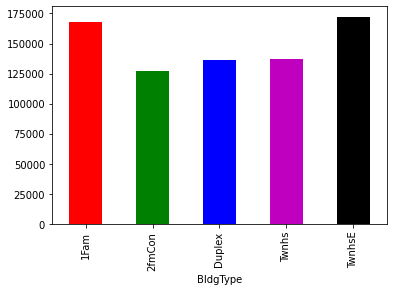

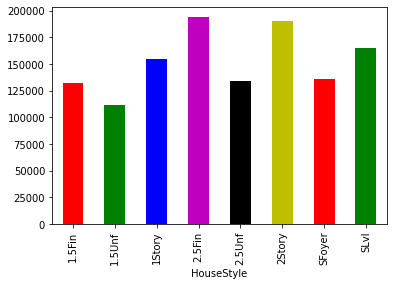

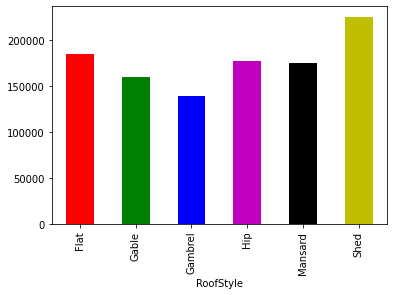

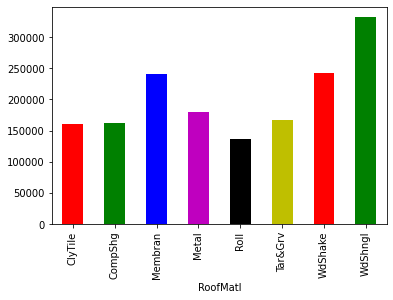

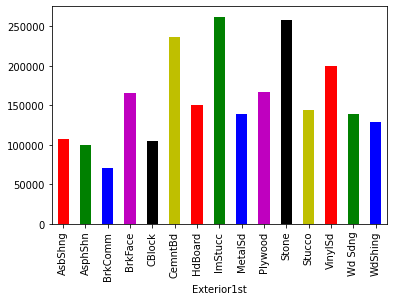

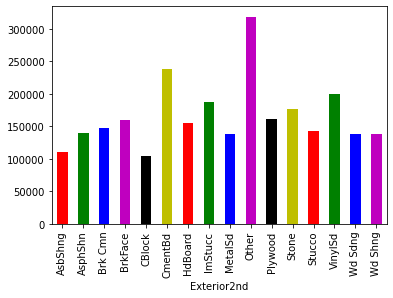

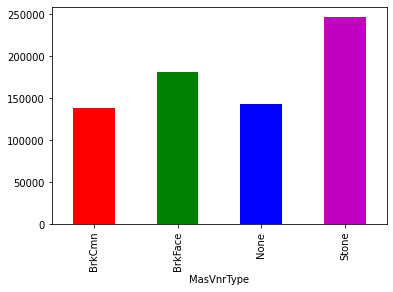

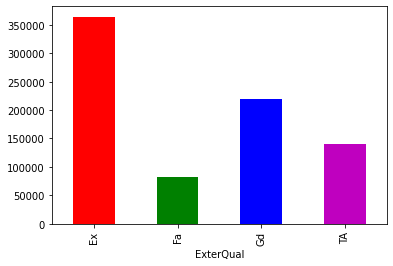

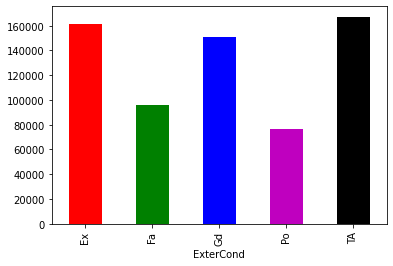

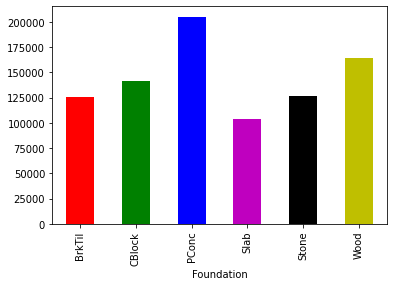

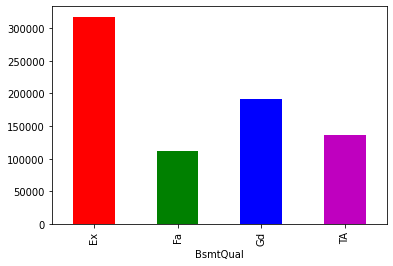

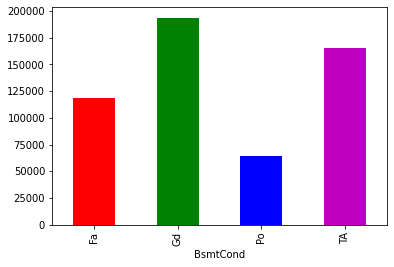

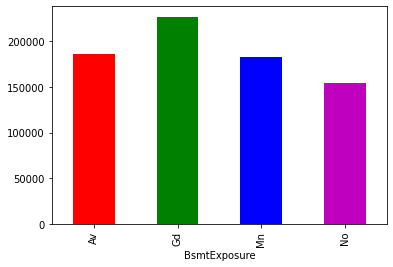

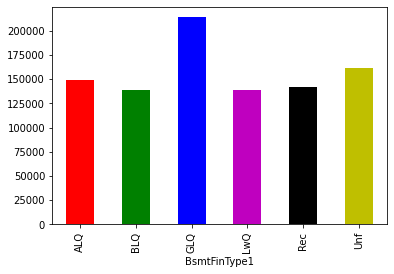

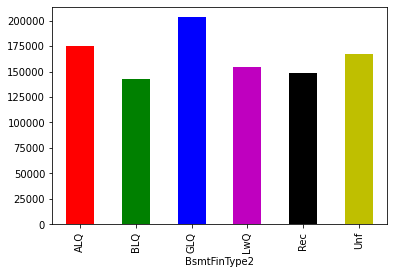

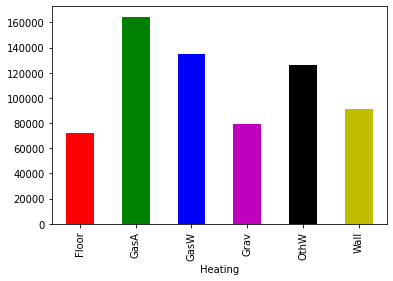

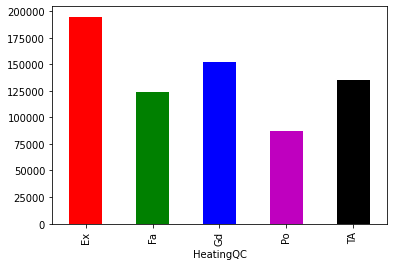

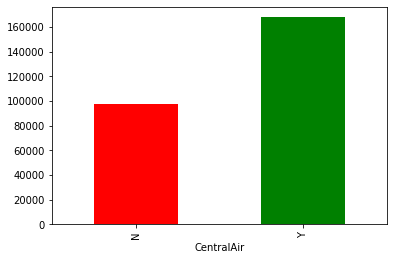

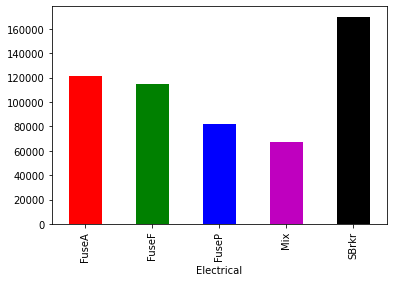

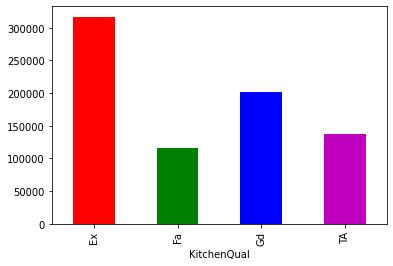

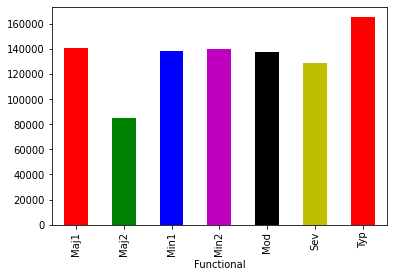

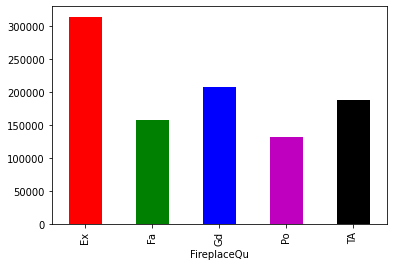

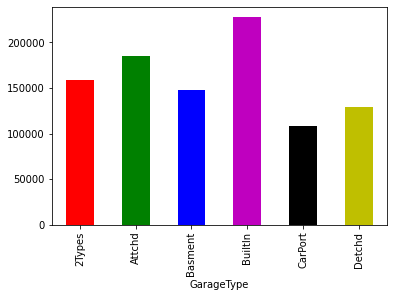

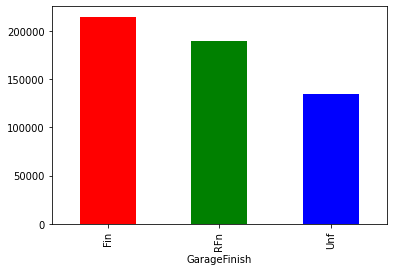

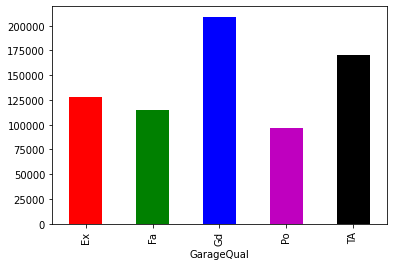

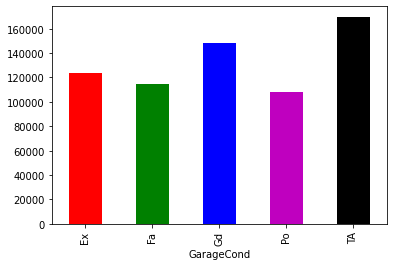

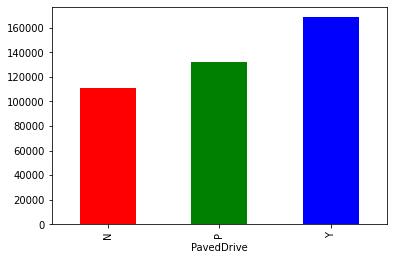

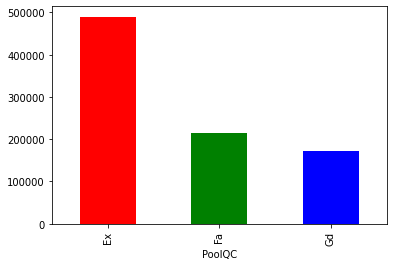

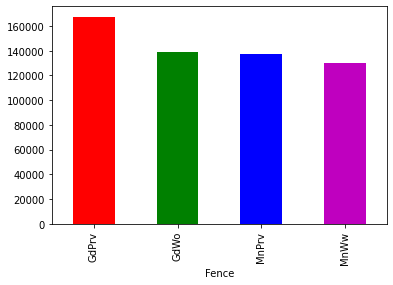

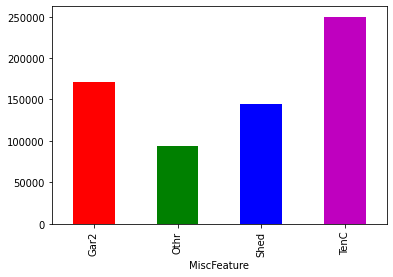

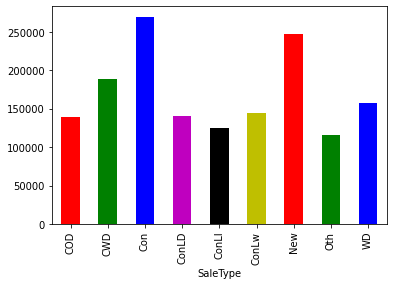

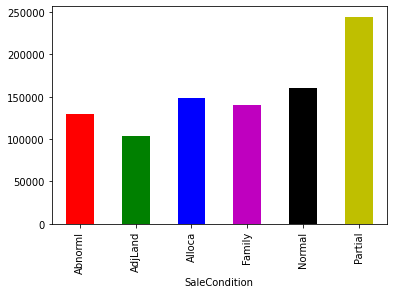

In [33]:
## Cheking Categorical Values 
for _feature in All_Categorical:
  _data=df.copy()
  _data.groupby(_feature)["SalePrice"].median().plot.bar(color=["r",'g',"b","m","k","y"])
  plt.show()

In [0]:
def Chi2CheckRelationship(dependent,ListFeature2,dataset,alpha):
  import scipy.stats as stats
  from scipy.stats import chi2
  for Feature in ListFeature2:
    if((dataset[Feature].dtypes == "O")):

      try:  
        Dataset_table=pd.crosstab(index=dataset[dependent],columns=dataset[Feature])
        Observed_values=Dataset_table.values
        Expected_values=stats.chi2_contingency(Dataset_table)[3] ## Take The Expected Values
        no_of_rows=len(Dataset_table.iloc[:,0])
        no_of_columns=len(Dataset_table.iloc[0,:])
        ddof= ( no_of_rows - 1 ) * ( no_of_columns - 1 )
        alph=alpha
        
        chi_square=sum([(o-e)**2/e for o,e in zip(Observed_values,Expected_values)])
        chi_statistic=chi_square[0] + chi_square[1]
        
        critical_value=chi2.ppf( q = 1-alph ,df=ddof) 
        #P-Value
        p_value=1-chi2.cdf( x=chi_statistic , df=ddof )
        if( chi_statistic >= critical_value  and p_value <= alph ) :
          print("Retain H0 , There's a relationship between {} and {} P_value --> {} ".format(dependent,Feature,np.round(p_value,5)))
        # else:
        #   print("Reject H0 , There's no relationship between {} and {}".format(dependent,Feature))
      except:
          print("Can't Fix --> " , Feature)
        

In [91]:
for _feature in All_Categorical:
  Chi2CheckRelationship(_feature,All_Categorical,df,0.05)

Retain H0 , There's a relationship between MSZoning and MSZoning P_value --> 0.0 
Retain H0 , There's a relationship between MSZoning and Street P_value --> 0.0 
Retain H0 , There's a relationship between MSZoning and Alley P_value --> 0.0 
Retain H0 , There's a relationship between MSZoning and LotShape P_value --> 0.0 
Retain H0 , There's a relationship between MSZoning and LandContour P_value --> 0.0008 
Retain H0 , There's a relationship between MSZoning and LandSlope P_value --> 0.0122 
Retain H0 , There's a relationship between MSZoning and BldgType P_value --> 5e-05 
Retain H0 , There's a relationship between MSZoning and HouseStyle P_value --> 0.0 
Retain H0 , There's a relationship between MSZoning and MasVnrType P_value --> 0.03207 
Retain H0 , There's a relationship between MSZoning and ExterQual P_value --> 0.0 
Retain H0 , There's a relationship between MSZoning and ExterCond P_value --> 0.00646 
Retain H0 , There's a relationship between MSZoning and Foundation P_value --

LOL

In [0]:
def AnovaTest(Dependent,dataset):
  import scipy.stats as stats
  from scipy.stats import chi2
  for feature in dataset.columns:
    ss_w=0
    ss_b=0
    if (dataset[feature].dtypes == "O"):
      df_anova=dataset[[Dependent,feature]]
  
      unique=pd.unique(df_anova[feature].values)
      d_data={cat:df_anova[Dependent][df_anova[feature] == cat] for cat in unique}
      
      for d in d_data:
        ss_b += d_data[d].shape[0] * \
        np.sum(  ( d_data[d].mean() - df_anova[Dependent].mean() )  ** 2) ##each Group mean - total group mean
     
      for d in d_data:
        ss_w += np.sum(  ( d_data[d] - d_data[d].mean() ) **2  )
        
      msb = ss_b / ((df_anova[feature].nunique()) - 1)
      msw = ss_w / ( len(df_anova) - (df_anova[feature].nunique())  )
      
      p_value=stats.f.sf( msb/msw,( (df_anova[feature].nunique() ) - 1),( len(df_anova) - (df_anova[feature].nunique()) ) )
      if(p_value <= 0.05 ) :
          print("Retain H0 , There's a relationship between {} and {} --> p-value --> {}".format(Dependent,feature,round(p_value ,5 )))
      #print("F_Statistic --> {} ".format(msb/msw))
      #print("P--Value --> {} ".format(round(p_value,5)))


In [93]:
AnovaTest("SalePrice",df)

Retain H0 , There's a relationship between SalePrice and MSZoning --> p-value --> 0.0
Retain H0 , There's a relationship between SalePrice and LotShape --> p-value --> 0.0
Retain H0 , There's a relationship between SalePrice and LandContour --> p-value --> 0.0
Retain H0 , There's a relationship between SalePrice and LotConfig --> p-value --> 0.0
Retain H0 , There's a relationship between SalePrice and Neighborhood --> p-value --> 0.0
Retain H0 , There's a relationship between SalePrice and Condition1 --> p-value --> 0.0
Retain H0 , There's a relationship between SalePrice and Condition2 --> p-value --> 0.04343
Retain H0 , There's a relationship between SalePrice and BldgType --> p-value --> 0.0
Retain H0 , There's a relationship between SalePrice and HouseStyle --> p-value --> 0.0
Retain H0 , There's a relationship between SalePrice and RoofStyle --> p-value --> 0.0
Retain H0 , There's a relationship between SalePrice and RoofMatl --> p-value --> 0.0
Retain H0 , There's a relationship 